#ANN

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('query (4).csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-02-21T10:11:47.799Z,28.5633,87.5409,10.000,4.9,mb,68.0,67.0,2.137,0.97,...,2025-02-27T21:38:11.659Z,"98 km NE of Lobuche, Nepal",earthquake,7.89,1.862,0.054,107.0,reviewed,us,us
1,2025-02-20T06:02:58.563Z,25.7977,90.6738,10.000,4.3,mb,34.0,154.0,3.911,0.99,...,2025-03-08T12:23:12.040Z,"42 km S of Goālpāra, India",earthquake,7.77,1.852,0.106,25.0,reviewed,us,us
2,2025-02-17T00:06:52.349Z,28.5887,77.1025,10.000,4.2,mb,32.0,204.0,7.258,0.61,...,2025-03-11T22:13:27.498Z,"10 km SSE of Nāngloi Jāt, India",earthquake,7.96,1.946,0.128,17.0,reviewed,us,us
3,2025-02-16T03:28:58.344Z,29.0272,87.5405,10.000,4.8,mb,79.0,94.0,2.337,0.75,...,2025-03-07T02:46:18.532Z,"132 km W of Rikaze, China",earthquake,8.91,1.865,0.058,94.0,reviewed,us,us
4,2025-02-15T17:48:18.144Z,33.4067,73.0563,35.848,4.7,mb,139.0,42.0,3.441,0.64,...,2025-03-05T18:06:52.476Z,"21 km S of Rawalpindi, Pakistan",earthquake,8.23,4.417,0.046,149.0,reviewed,us,us


In [3]:
columns_to_drop = ['net','id','magType', 'nst', 'gap', 'dmin', 'rms', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']
df = df.drop(columns = columns_to_drop)


In [4]:
df = df.dropna()

In [5]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year.astype('int16')
df['month'] = df['time'].dt.month.astype('int8')
df['Day'] = df['time'].dt.day.astype('int8')
df['hour'] = df['time'].dt.hour.astype('int8')
df = df.drop(columns = ['time'])

In [6]:
df.head()

,latitude,longitude,depth,mag,year,month,Day,hour
0,28.5633,87.5409,10.000,4.9,2025,2,21,10
1,25.7977,90.6738,10.000,4.3,2025,2,20,6
2,28.5887,77.1025,10.000,4.2,2025,2,17,0
3,29.0272,87.5405,10.000,4.8,2025,2,16,3
4,33.4067,73.0563,35.848,4.7,2025,2,15,17


In [7]:
#Optimize data
df['latitude'] = df['latitude'].astype('float32')
df['longitude'] = df ['longitude'].astype('float32')
df['depth'] = df['depth'].astype('float32')
df['mag'] = df['mag'].astype('float32')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
print("Full DataFrame shape:", df.shape)
print("Columns in DataFrame:", df.columns.tolist())

Full DataFrame shape: (6940, 8)
Columns in DataFrame: ['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'Day', 'hour']


In [10]:
#setting features and target
features = df[[	'latitude', 'longitude','depth','mag','year','month','Day','hour']]
target = df['mag']

In [11]:
print("Features shape (raw):", features.shape)
print("Target shape (raw):", target.shape)

Features shape (raw): (6940, 8)
Target shape (raw): (6940,)


In [12]:
#scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [20]:
#test_train split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size = 0.2, random_state = 42)

In [14]:
print("Features shape:", features_scaled.shape)
print("Target shape:", target.shape)

Features shape: (6940, 8)
Target shape: (6940,)


Build ANN

In [15]:
model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu')) 
model.add(Dense(32, activation = 'relu'))
model.add (Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'Adam', metrics = ['mae'])

C:\Users\Guru G\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train

In [16]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2, verbose = 1)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 13.1681 - mae: 3.5131 - val_loss: 2.9593 - val_mae: 1.5230
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8195 - mae: 1.1216 - val_loss: 0.8553 - val_mae: 0.7370
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8009 - mae: 0.7116 - val_loss: 0.7062 - val_mae: 0.6634
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6639 - mae: 0.6419 - val_loss: 0.6219 - val_mae: 0.6208
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5960 - mae: 0.6121 - val_loss: 0.5609 - val_mae: 0.5872
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5345 - mae: 0.5789 - val_loss: 0.5110 - val_mae: 0.5600
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4894 - mae: 0.5569 - val_loss: 0.4699 - val_mae: 0.5354
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4392 - mae: 0.5239 - val_loss: 0.4256 - val_mae: 0.5117
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4117 - mae

Evaluate

In [17]:
loss,mae = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Mean Absolute Error: {mae:.2f}')

Test Mean Absolute Error: 0.04


In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['mae'])

In [22]:
from keras_tuner import RandomSearch
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', 32, 128, step=32), input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(hp.Int('units2', 16, 64, step=16), activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(hp.Choice('lr', [1e-2, 1e-3, 1e-4])), metrics=['mae'])
    return model
tuner = RandomSearch(build_model, objective='val_mae', max_trials=5, executions_per_trial=3)
tuner.search(x_train, y_train, epochs=50, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 00m 55s]
val_mae: 0.012575594087441763

Best val_mae So Far: 0.0013513839803636074
Total elapsed time: 00h 04m 41s


C:\Users\Guru G\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
mae_scores =[]

for train_idx, test_idx in kf.split(features_scaled):
    x_train, x_test = features_scaled[train_idx], features_scaled[test_idx]
    y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation = 'relu'))
    model.add(Dense(32, activation ='relu'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
model.fit(x_train, y_train, epochs = 50, batch_size = 128, verbose = 0)
loss, mae = model.evaluate(x_test, y_test, verbose = 0)
mae_scores.append(mae)
print(f'Mean MAE: {np.mean(mae_scores):.2f}, std:{np.std(mae_scores):.2f}')

Mean MAE: 0.04, std:0.00


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0993e-04 - mae: 0.0082 - val_loss: 4.3030e-04 - val_mae: 0.0154
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0452e-04 - mae: 0.0079 - val_loss: 4.4623e-04 - val_mae: 0.0156
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5808e-05 - mae: 0.0075 - val_loss: 4.1363e-04 - val_mae: 0.0151
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1659e-05 - mae: 0.0074 - val_loss: 4.3679e-04 - val_mae: 0.0156
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0830e-04 - mae: 0.0081 - val_loss: 3.8754e-04 - val_mae: 0.0147
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3132e-05 - mae: 0.0074 - val_loss: 3.4980e-04 - val_mae: 0.0141
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0110e-04 - mae: 0.0078 - val_loss: 3.7483e-04 - val_mae: 0.0143
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8291e-05 - mae: 0.0073 - val_loss: 3.8946e-04 - val_mae: 0.0146
Epoch 9/

TypeError: 'function' object is not subscriptable

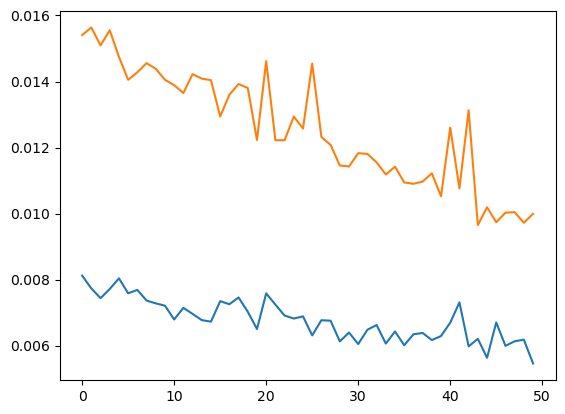

In [45]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2, verbose = 1)
plt.plot(history.history ['mae'], label = ['Train MAE'])
plt.plot(history.history ['val_mae'], label = ['Val MAE'])
plt.xlabel['epochs']
plt.ylabel['MAE']
plt.legend()
plt.show()

In [46]:
# In your notebook, after training
model.save('earthquake_magnitude_model.h5')
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']